# __Import the dependencies__

In [90]:
import pandas as pd  # useful for seperating and analyzing the data
import matplotlib.pyplot as plt
import seaborn as sns
# plt and sns are useful for plotting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# __Data selection and processing__

In [91]:
#  loading the data set from csv file to pandas data frame
car_dataset = pd.read_csv("./car_data.csv")

In [92]:
# inspecting the first five rows of the data set
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [93]:
# checking the number of rows and columns of the dataset
car_dataset.shape

(301, 9)

In [94]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


non-null values are the data points which are not missing in that row  
object is nothing but categorical data (text)

In [95]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [96]:
# checking the distribution of categorical data
car_dataset.Fuel_Type.value_counts(), car_dataset.Seller_Type.value_counts(), car_dataset.Transmission.value_counts()

(Petrol    239
 Diesel     60
 CNG         2
 Name: Fuel_Type, dtype: int64,
 Dealer        195
 Individual    106
 Name: Seller_Type, dtype: int64,
 Manual       261
 Automatic     40
 Name: Transmission, dtype: int64)

Data in these columns are in text, our ml model cannot understand text, so we turn them into numbers, this is known as __encoding the data__

# Encoding the data

In [97]:
# encoding "Fuel_Type" Column
car_dataset.replace({"Fuel_Type" : {"Petrol" : 0, "Diesel" : 1, "CNG" : 2}},inplace=True)

In [98]:
# encoding "Seller_Type" Column
car_dataset.replace({"Seller_Type" : {"Dealer" : 0, "Individual" : 1}},inplace=True)

In [99]:
# encoding "Transmission" Column
car_dataset.replace({"Transmission" : {"Manual" : 0, "Automatic" : 1}},inplace=True)

In [100]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data into training and test data

Car_Name wont give much information to predict the Selling_Price, so drop the Car_Name from the dataset  
X is the dataset without Car_Name and Selling_Price  
Y is data of only Selling_Price which is the target (we need to predict the Selling_Price)

In [101]:
X = car_dataset.drop(["Car_Name","Selling_Price"],axis=1) # if we drop the column, then axis=1 otherwise axis=0
Y = car_dataset["Selling_Price"]

In [102]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [103]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

__Splitting training and test data__

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

__Model Training__

1. Linear Regression

In [105]:
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [106]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

__Model Evaluation__

In [107]:
# prediction of training data
training_data_prediction = lin_reg_model.predict(X_train)

In [108]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493698


__Visualize the actual prices and Predicted prices__

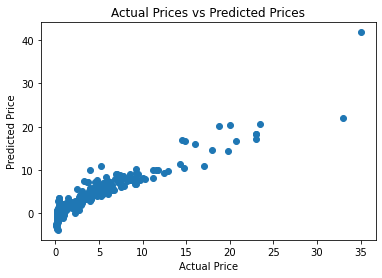

In [109]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [110]:
# prediction on Testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [111]:
# R squared Error
error_score_test = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared Error : ", error_score_test)

R squared Error :  0.8365766715026905


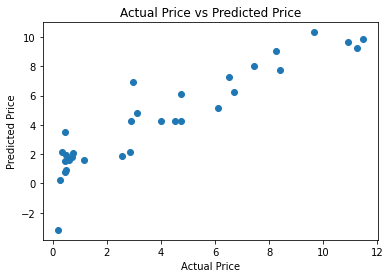

In [112]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2. Lasso Regression

In [113]:
lass_reg_model = Lasso()

In [114]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

__Model Evaluation__

In [115]:
training_data_prediction = lass_reg_model.predict(X_train)

In [116]:
error_score = metrics.r2_score(Y_train,training_data_prediction)
error_score

0.8427856123435794

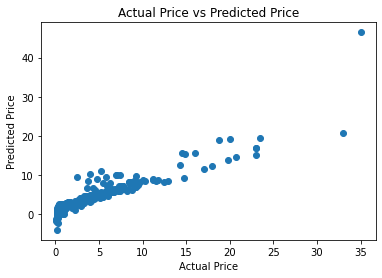

In [117]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [118]:
testing_data_prediction = lass_reg_model.predict(X_test)

In [119]:
error_score = metrics.r2_score(Y_test,testing_data_prediction)
error_score

0.8709167941173195

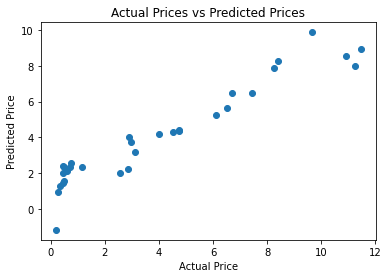

In [120]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

__Overall Process:__
1. Importing the dependencies
2. Encoding the data
3. Split the data into training and testing data